<a href="https://colab.research.google.com/github/kathir065/CREDIT-CARD-FRAUD-DETECTION/blob/main/phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving creditcard.csv to creditcard.csv
Dataset shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


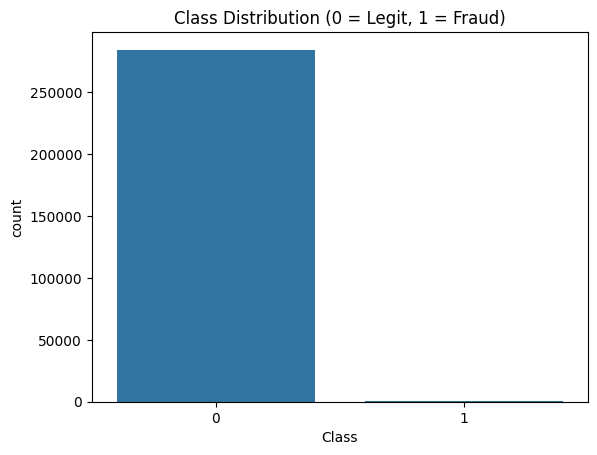

After SMOTE balancing: Class
0    227451
1    227451
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,505 (5.88 KB)

 Trainable params: 1,505 (5.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6861 - loss: 0.8064 - val_accuracy: 0.8816 - val_loss: 0.1960
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9375 - loss: 0.1690 - val_accuracy: 0.9126 - val_loss: 0.1610
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9542 - loss: 0.1184 - val_accuracy: 0.9360 - val_loss: 0.1265
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9611 - loss: 0.0997 - val_accuracy: 0.9496 - val_loss: 0.1040
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9677 - loss: 0.0830 - val_accuracy: 0.9622 - val_loss: 0.0845
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9723 - loss: 0.0732 - val_accuracy: 0.9697 - val_loss: 0.0729
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9758 - loss: 0.0643 - val_accuracy: 0.9815 - val_loss: 0.0573
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9795 - loss: 0.0559 - val_accuracy

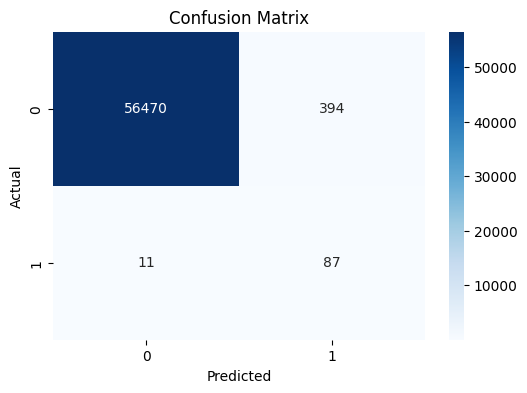

ROC AUC Score: 0.9759


In [4]:
# Step 1: Install Required Packages
!pip install -q imbalanced-learn scikit-learn pandas matplotlib seaborn tensorflow

# Step 2: Upload Dataset Manually
from google.colab import files
uploaded = files.upload()  # Choose 'creditcard.csv' from your system

# Step 3: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import io
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

# Step 4: Data Overview
print("Dataset shape:", df.shape)
print(df['Class'].value_counts())

sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

# Step 5: Preprocessing
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df.drop(['Time'], axis=1, inplace=True)

X = df.drop('Class', axis=1)
y = df['Class']

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 7: Balance Data with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print("After SMOTE balancing:", pd.Series(y_res).value_counts())

# Step 8: Build Deep Learning Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_res.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 9: Train the Model
history = model.fit(X_res, y_res, epochs=10, batch_size=2048, validation_split=0.2, verbose=1)

# Step 10: Evaluate the Model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC AUC Score
roc_score = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_score:.4f}")